# Data Preparation

Data preparation (or data preprocessing) in this context means manipulation of data into a form suitable for further analysis and processing. It is a process that involves many different tasks and which cannot be fully automated. Many of the data preparation activities are routine, tedious, and time consuming. It has been estimated that data preparation accounts for 60%-80% of the time spent on a data mining project.

A difficulty is that different algorithms make different assumptions about your data and may require different transforms. Further, when you follow all of the rules and prepare your data, sometimes algorithms can deliver better results without the preprocessing.

## Useful Libraries

### Pandas

A really useful library that you will want to use for data analysis and data manipulation is **`Pandas`**.

It is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

**Pandas Highlights:**

* A fast and efficient DataFrame object for data manipulation with integrated indexing.
* Tools for reading and writing data between in-memory data structures and different formats: CSV and text files, Microsoft Excel, SQL databases, and the fast HDF5 format.
* High performance merging and joining of data sets
* Time series-functionality: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging. Even create domain-specific time offsets and join time series without losing data

You can read more about Pandas [here](http://pandas.pydata.org/).

### NumPy

NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more.

You can read more about NumPy [here](https://docs.scipy.org/doc/numpy/user/whatisnumpy.html)

#### Why NumPy???

* **Memory efficiency:** NumPy's arrays are more compact than Python lists. Python lists would take at least 20 MB or so, while a NumPy 3D array with single-precision floats in the cells would fit in 4 MB. Access in reading and writing items is also faster with NumPy.

* **Conveniency:** You get a lot of vector and matrix operations for free, which sometimes allow one to avoid unnecessary work. And they are also efficiently implemented.

* **Speed:** Here's a test on doing a sum over a list and a NumPy array, showing that the sum on the NumPy array is 10x faster.

In [2]:
from numpy import arange
from timeit import Timer

Nelements = 10000
Ntimeits = 10000

x = arange(Nelements)
y = range(Nelements)

t_numpy = Timer("x.sum()", "from __main__ import x")
t_list = Timer("sum(y)", "from __main__ import y")
print "numpy: %.3e" % (t_numpy.timeit(Ntimeits)/Ntimeits,)
print "list:  %.3e" % (t_list.timeit(Ntimeits)/Ntimeits,)

numpy: 5.879e-06
list:  5.353e-05


## Read Data

You can also explicitly read from and write to files directly in your code. Python makes working with files pretty simple.

The first step to working with a text file is to obtain a  le object using open:

In [3]:
# 'r' means read-only
file_for_reading = open('reading_file.txt', 'r')

# 'w' is write -- will destroy the file if it already exists!
file_for_writing = open('writing_file.txt', 'w')

# 'a' is append -- for adding to the end of the file
file_for_appending = open('appending_file.txt', 'a') # don't forget to close your files when you're done
file_for_writing.close()

### Delimited Files

More frequently you’ll work with files with lots of data on each line. These files are very often either comma-separated or tab-separated. Each line has several fields, with a comma (or a tab) indicating where one field ends and the next field starts.

This starts to get complicated when you have fields with commas and tabs and new‐ lines in them (which you inevitably do). For this reason, it’s pretty much always a mistake to try to parse them yourself. Instead, you should use Python’s csv module (or the pandas library).

If your file has no headers (which means you probably want each row as a list, and which places the burden on you to know what’s in each column), you can use csv.reader to iterate over the rows, each of which will be an appropriately split list.

In [3]:
import csv

with open('tab_delimited_stock_prices.txt', 'rb') as f: 
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        date = row[0]
        symbol = row[1]
        closing_price = float(row[2])
#         process(date, symbol, closing_price)

If your file has headers you can either skip the header row (with an initial call to `reader.next()`) or get each row as a `dict` (with the headers as keys) by using `csv.DictReader`:

In [8]:
with open('colon_delimited_stock_prices.txt', 'rb') as f: 
    reader = csv.DictReader(f, delimiter=':')
    for row in reader:
        date = row["date"]
        symbol = row["symbol"]
        closing_price = float(row["closing_price"])

Even if your file doesn’t have headers you can still use DictReader by passing it the keys as a fieldnames parameter.

## Cleaning and Munging

Real-world data is dirty. Often you’ll have to do some work on it before you can use it. 

* We have to convert strings to floats or ints before we can use them. Previously, we did that right before using the data:

In [6]:
closing_price = float(row["closing_price"])

* We have to convert strings to dates:

In [10]:
#Read file
with open('colon_delimited_stock_prices.txt', 'rb') as f: 
    reader = csv.DictReader(f, delimiter=':')
    for row in reader:
        date = row["date"]
        symbol = row["symbol"]
        closing_price = float(row["closing_price"])

In [12]:
print date
type(date)

6/20/2014


str

It is clear the the `date` is saved as a string. We have to help our "reader" to see that the value saved in `date` is not a string, but an actual date!

In [16]:
import datetime
from datetime import datetime

datetime_object = datetime.strptime('Jun 1 2005  1:33PM', '%b %d %Y %I:%M%p')

#In our case
new_date = datetime.strptime(date, '%m/%d/%Y')

In [14]:
print new_date
type(new_date)

2014-06-20 00:00:00


datetime.datetime

It is usually helpful to read dates from the beginning, and not convert them to datetime objects at a later stage.

In [19]:
#Read file
with open('colon_delimited_stock_prices.txt', 'rb') as f: 
    reader = csv.DictReader(f, delimiter=':')
    for row in reader:
        date = datetime.strptime(row["date"], '%m/%d/%Y')
        symbol = row["symbol"]
        closing_price = float(row["closing_price"])
        
print date
type(date)

2014-06-20 00:00:00


datetime.datetime

*Something a little bit more advanced... It is not necessary to understand it now. It's interesting and probably useful to learn it, if you decide to dive deep into Python.*

It’s probably less error-prone to do the parsing on the way in, which we can do by creating a function that wraps csv.reader. We’ll give it a list of parsers, each specifying how to parse one of the columns. And we’ll use None to represent “don’t do any‐ thing to this column”:

In [7]:
def parse_row(input_row, parsers):
    #given a list of parsers (some of which may be None) apply the appropriate one to each element of the input_row
    return [parser(value) if parser is not None else value 
            for value, parser in zip(input_row, parsers)]

In [36]:
def parse_rows_with(reader, parsers):
    #wrap a reader to apply the parsers to each of its rows
    for row in reader:
        yield parse_row(row, parsers)

What if there’s bad data? A **float** value that doesn’t actually represent a number? We’d usually rather get a None than crash our program. We can do this with a helper function:

In [9]:
def try_or_none(f):
#wraps f to return None if f raises an exception assumes f takes only one input
    def f_or_none(x):
        try: return f(x)
        except: return None 
    return f_or_none

after which we can rewrite parse_row to use it:

In [10]:
def parse_row(input_row, parsers):
    return [try_or_none(parser)(value) if parser is not None else value
        for value, parser in zip(input_row, parsers)]

In [11]:
import dateutil.parser 
data = []

In [12]:
#read and parse in a single step
with open("comma_delimited_stock_prices.csv", "rb") as f:
    reader = csv.reader(f)
    for line in parse_rows_with(reader, [dateutil.parser.parse, None, float]):
        data.append(line)

after which we just need to check for None rows and decide what we want to do about them. (Generally speaking, the three options are to get rid of them, to go back to the source and try to fix the bad/missing data, or to do nothing and cross our fingers.)

In [13]:
for row in data:
    if any(x is None for x in row):
        print row

[datetime.datetime(2014, 6, 19, 0, 0), 'MSFT', None]


## 1. Rescale Data

When your data is comprised of attributes with varying scales, many machine learning algorithms can benefit from rescaling the attributes to all have the same scale.

Often this is referred to as **normalization** and attributes are often rescaled into the range between 0 and 1. This is useful for optimization algorithms in used in the core of machine learning algorithms like gradient descent. It is also useful for algorithms that weight inputs like regression and neural networks and algorithms that use distance measures like K-Nearest Neighbors.

In [14]:
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv(url, names=names)

In [15]:
dataframe.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
array = dataframe.values

# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
rescaledX

array([[ 0.35294118,  0.74371859,  0.59016393, ...,  0.50074516,
         0.23441503,  0.48333333],
       [ 0.05882353,  0.42713568,  0.54098361, ...,  0.39642325,
         0.11656704,  0.16666667],
       [ 0.47058824,  0.91959799,  0.52459016, ...,  0.34724292,
         0.25362938,  0.18333333],
       ..., 
       [ 0.29411765,  0.6080402 ,  0.59016393, ...,  0.390462  ,
         0.07130658,  0.15      ],
       [ 0.05882353,  0.63316583,  0.49180328, ...,  0.4485842 ,
         0.11571307,  0.43333333],
       [ 0.05882353,  0.46733668,  0.57377049, ...,  0.45305514,
         0.10119556,  0.03333333]])

In [17]:
# summarize transformed data
np.set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[ 0.353  0.744  0.59   0.354  0.     0.501  0.234  0.483]
 [ 0.059  0.427  0.541  0.293  0.     0.396  0.117  0.167]
 [ 0.471  0.92   0.525  0.     0.     0.347  0.254  0.183]
 [ 0.059  0.447  0.541  0.232  0.111  0.419  0.038  0.   ]
 [ 0.     0.688  0.328  0.354  0.199  0.642  0.944  0.2  ]]


## 2. Standardize Data

Standardization is a useful technique to transform attributes with a Gaussian distribution and differing means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1.

It is most suitable for techniques that assume a Gaussian distribution in the input variables and work better with rescaled data, such as linear regression, logistic regression and linear discriminate analysis.

You can standardize data using scikit-learn with the StandardScaler class

In [18]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv(url, names=names)
array = dataframe.values

# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]

#StandardScaler(): Standardize features by removing the mean and scaling to unit variance
#fit(X): Compute the mean and std to be used for later scaling.
scaler = StandardScaler().fit(X)

In [19]:
import matplotlib
import matplotlib.pyplot as plt

# Enable inline plotting
%matplotlib inline

# matplotlib style options
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 8)

In [20]:
X[0:5,:]

array([[  6.000e+00,   1.480e+02,   7.200e+01,   3.500e+01,   0.000e+00,
          3.360e+01,   6.270e-01,   5.000e+01],
       [  1.000e+00,   8.500e+01,   6.600e+01,   2.900e+01,   0.000e+00,
          2.660e+01,   3.510e-01,   3.100e+01],
       [  8.000e+00,   1.830e+02,   6.400e+01,   0.000e+00,   0.000e+00,
          2.330e+01,   6.720e-01,   3.200e+01],
       [  1.000e+00,   8.900e+01,   6.600e+01,   2.300e+01,   9.400e+01,
          2.810e+01,   1.670e-01,   2.100e+01],
       [  0.000e+00,   1.370e+02,   4.000e+01,   3.500e+01,   1.680e+02,
          4.310e+01,   2.288e+00,   3.300e+01]])

/Users/imarkou/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:5907: UserWarning: 2D hist input should be nsamples x nvariables;
 this looks transposed (shape is 5 x 8)
  '(shape is %d x %d)' % inp.shape[::-1])


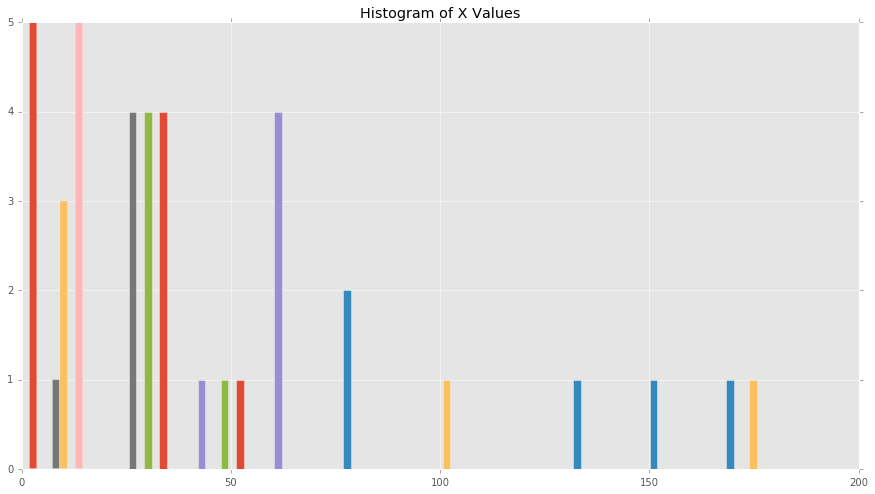

In [21]:
plt.hist(X[0:5,:])
plt.title("Histogram of X Values")
plt.grid(True)
plt.show()

In [22]:
#Perform standardization by centering and scaling
rescaledX = scaler.transform(X)

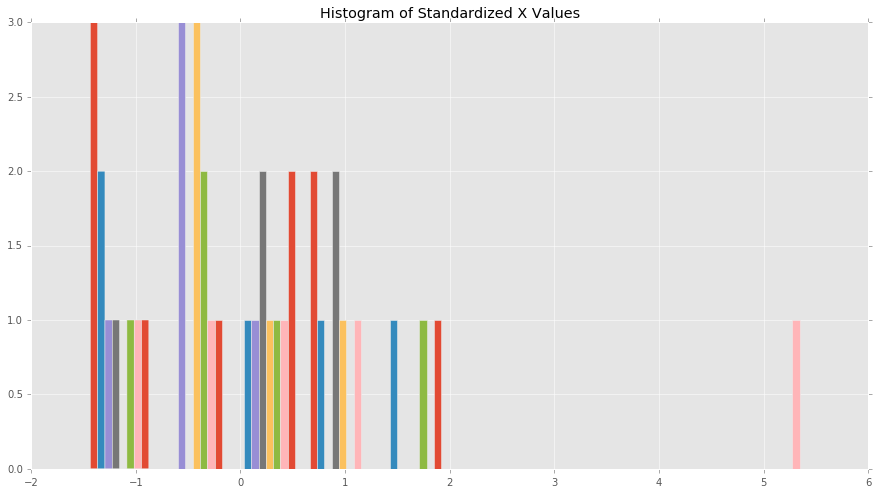

In [23]:
plt.hist(rescaledX[0:5,:])
plt.title("Histogram of Standardized X Values")
plt.grid(True)
plt.show()

In [24]:
# summarize transformed data
np.set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]


## 3. Normalize Data

Normalizing in scikit-learn refers to rescaling each observation (row) to have a length of 1 (called a unit norm in linear algebra).

This preprocessing can be useful for sparse datasets (lots of zeros) with attributes of varying scales when using algorithms that weight input values such as neural networks and algorithms that use distance measures such as K-Nearest Neighbors.

You can normalize data in Python with scikit-learn using the **Normalizer** class.

In [25]:
# Normalize data (length of 1)
from sklearn.preprocessing import Normalizer

# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)

In [26]:
# summarize transformed data
np.set_printoptions(precision=3)
print(normalizedX[0:5,:])

[[ 0.034  0.828  0.403  0.196  0.     0.188  0.004  0.28 ]
 [ 0.008  0.716  0.556  0.244  0.     0.224  0.003  0.261]
 [ 0.04   0.924  0.323  0.     0.     0.118  0.003  0.162]
 [ 0.007  0.588  0.436  0.152  0.622  0.186  0.001  0.139]
 [ 0.     0.596  0.174  0.152  0.731  0.188  0.01   0.144]]


## 4. Binarize Data

You can transform your data using a binary threshold. All values above the threshold are marked 1 and all equal to or below are marked as 0.

This is called binarizing your data or threshold your data. It can be useful when you have probabilities that you want to make crisp values. It is also useful when feature engineering and you want to add new features that indicate something meaningful.

You can create new binary attributes in Python using scikit-learn with the **Binarizer** class.

In [27]:
from sklearn.preprocessing import Binarizer

# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]

binarizer = Binarizer(threshold=0.0).fit(X)
binaryX = binarizer.transform(X)

# summarize transformed data
np.set_printoptions(precision=3)
print(binaryX[0:5,:])

[[ 1.  1.  1.  1.  0.  1.  1.  1.]
 [ 1.  1.  1.  1.  0.  1.  1.  1.]
 [ 1.  1.  1.  0.  0.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.]
 [ 0.  1.  1.  1.  1.  1.  1.  1.]]


## 5. Working with date and time

The **`datetime`** module supplies classes for manipulating dates and times in both simple and complex ways. While date and time arithmetic is supported, the focus of the implementation is on efficient attribute extraction for output formatting and manipulation. 

In [28]:
from datetime import datetime

datetime_object = datetime.strptime('Jun 1 2005  1:33PM', '%b %d %Y %I:%M%p')
print datetime_object

2005-06-01 13:33:00


A file reader in python is not smart enough to know the type of data that is included in each column. We need to help it "see" what we want it to see.

In [33]:
#Read file using pandas
data = pd.read_csv('restaurantsCourse.csv', parse_dates = [8])
data.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,50007215,MARTINIELLO'S PIZZERIA,QUEENS,9506,ROOSEVELT AVE,11372,7187794733,Pizza,2014-03-19,Violations were cited in the following area(s).,02G,Cold food item held above 41��� F (smoked fish...,Critical,26,NaN,NaN,04/01/2017,Pre-permit (Operational) / Initial Inspection
1,50001342,SMILE,QUEENS,3803,MAIN ST,11354,7184633333,Chinese,2015-08-06,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,31,C,08/06/2015,04/01/2017,Cycle Inspection / Re-inspection
2,41403545,3rd & 7,BROOKLYN,3622,QUENTIN ROAD,11234,7183366300,American,2014-10-01,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Critical,13,A,10/01/2014,04/01/2017,Cycle Inspection / Re-inspection
3,41129965,CAFE BASIL GOURMET,MANHATTAN,762764,3 AVENUE,10017,2127583700,American,2013-12-09,Violations were cited in the following area(s).,06E,"Sanitized equipment or utensil, including in-u...",Critical,12,A,12/09/2013,04/01/2017,Cycle Inspection / Initial Inspection
4,50017092,HE LIN RESTAURANT,QUEENS,8311,BROADWAY,11373,7186996688,Chinese,2015-01-07,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,21,NaN,NaN,04/01/2017,Pre-permit (Operational) / Initial Inspection


**OR**

In [35]:
#Read file using pandas
data = pd.read_csv('restaurantsCourse.csv')
data['INSPECTION DATE'] = pd.to_datetime(data['INSPECTION DATE'])
data.dtypes

CAMIS                             int64
DBA                              object
BORO                             object
BUILDING                          int64
STREET                           object
ZIPCODE                           int64
PHONE                             int64
CUISINE DESCRIPTION              object
INSPECTION DATE          datetime64[ns]
ACTION                           object
VIOLATION CODE                   object
VIOLATION DESCRIPTION            object
CRITICAL FLAG                    object
SCORE                             int64
GRADE                            object
GRADE DATE                       object
RECORD DATE                      object
INSPECTION TYPE                  object
dtype: object

Now you can play with dates, create interesting plots, do time-series analysis etc.!